In [ ]:
import pandas as pd
!pip install scikit-learn

In [ ]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler

In [ ]:
df = pd.read_csv("cybersecurity_attacks.csv")

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# List of columns to drop
columns_to_drop = ["Timestamp", "Session ID", "Source IP Address", "Destination IP Address","Payload Data", "Packet ID","Geo-location Data","User Information","Attack Signature","Network Segment","Proxy Information"]

# Drop only columns that exist in the dataset
df.drop(columns=[col for col in columns_to_drop if col in df.columns], inplace=True)

print("Dropped Irrelevant Columns (if found)")
df.info()

Dropped Irrelevant Columns (if found)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source Port         40000 non-null  int64  
 1   Destination Port    40000 non-null  int64  
 2   Protocol            40000 non-null  object 
 3   Packet Length       40000 non-null  int64  
 4   Packet Type         40000 non-null  object 
 5   Traffic Type        40000 non-null  object 
 6   Malware Indicators  20000 non-null  object 
 7   Anomaly Scores      40000 non-null  float64
 8   Alerts/Warnings     19933 non-null  object 
 9   Attack Type         40000 non-null  object 
 10  Action Taken        40000 non-null  object 
 11  Severity Level      40000 non-null  object 
 12  Device Information  40000 non-null  object 
 13  Firewall Logs       20039 non-null  object 
 14  IDS/IPS Alerts      19950 non-null  object 
 15  Log Source     

In [ ]:
print(df["Packet Type"].unique())  # Check actual unique values

['Data' 'Control']


In [ ]:
df["Packet Type"] = df["Packet Type"].astype(str).str.strip().str.lower().map({"data": 0, "control": 1})


In [ ]:
print(df["Packet Type"].value_counts())  # Check if it's properly categorized
df.head(10)

Packet Type
1    20237
0    19763
Name: count, dtype: int64


,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Device Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,31225,17616,ICMP,503,0,HTTP,IoC Detected,28.67,NaN,Malware,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Log Data,NaN,Server
1,17245,48166,ICMP,1174,0,HTTP,IoC Detected,51.50,NaN,Malware,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Log Data,NaN,Firewall
2,16811,53600,UDP,306,1,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Log Data,Alert Data,Firewall
3,20018,32534,UDP,385,0,HTTP,NaN,15.79,Alert Triggered,Malware,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,NaN,Alert Data,Firewall
4,6131,26646,TCP,1462,0,DNS,NaN,0.52,Alert Triggered,DDoS,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,NaN,Alert Data,Firewall
5,17430,52805,UDP,1423,0,HTTP,NaN,5.76,NaN,Malware,Logged,Medium,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,NaN,NaN,Server
6,26562,17416,TCP,379,0,DNS,NaN,31.55,NaN,DDoS,Ignored,High,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,Log Data,NaN,Server
7,34489,20396,ICMP,1022,0,DNS,IoC Detected,54.05,Alert Triggered,Intrusion,Logged,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Log Data,Alert Data,Firewall
8,56296,20857,TCP,1281,1,FTP,IoC Detected,56.34,Alert Triggered,Intrusion,Blocked,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Log Data,Alert Data,Server
9,37918,50039,UDP,224,0,HTTP,NaN,16.51,Alert Triggered,Malware,Blocked,Medium,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,NaN,NaN,Server


In [ ]:
df["IDS/IPS Alerts"] = df["IDS/IPS Alerts"].notna().astype(int)
df.head(10)

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Device Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,31225,17616,ICMP,503,0,HTTP,IoC Detected,28.67,NaN,Malware,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Log Data,0,Server
1,17245,48166,ICMP,1174,0,HTTP,IoC Detected,51.50,NaN,Malware,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,Log Data,0,Firewall
2,16811,53600,UDP,306,1,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,Log Data,1,Firewall
3,20018,32534,UDP,385,0,HTTP,NaN,15.79,Alert Triggered,Malware,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,NaN,1,Firewall
4,6131,26646,TCP,1462,0,DNS,NaN,0.52,Alert Triggered,DDoS,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,NaN,1,Firewall
5,17430,52805,UDP,1423,0,HTTP,NaN,5.76,NaN,Malware,Logged,Medium,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,NaN,0,Server
6,26562,17416,TCP,379,0,DNS,NaN,31.55,NaN,DDoS,Ignored,High,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,Log Data,0,Server
7,34489,20396,ICMP,1022,0,DNS,IoC Detected,54.05,Alert Triggered,Intrusion,Logged,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,Log Data,1,Firewall
8,56296,20857,TCP,1281,1,FTP,IoC Detected,56.34,Alert Triggered,Intrusion,Blocked,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,Log Data,1,Server
9,37918,50039,UDP,224,0,HTTP,NaN,16.51,Alert Triggered,Malware,Blocked,Medium,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,NaN,0,Server


In [ ]:
df["Firewall Logs"] = df["Firewall Logs"].notna().astype(int)
df.head(10)

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Device Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,31225,17616,ICMP,503,0,HTTP,IoC Detected,28.67,NaN,Malware,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Server
1,17245,48166,ICMP,1174,0,HTTP,IoC Detected,51.50,NaN,Malware,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Firewall
2,16811,53600,UDP,306,1,HTTP,IoC Detected,87.42,Alert Triggered,DDoS,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,1,Firewall
3,20018,32534,UDP,385,0,HTTP,NaN,15.79,Alert Triggered,Malware,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0,1,Firewall
4,6131,26646,TCP,1462,0,DNS,NaN,0.52,Alert Triggered,DDoS,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,0,1,Firewall
5,17430,52805,UDP,1423,0,HTTP,NaN,5.76,NaN,Malware,Logged,Medium,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,0,0,Server
6,26562,17416,TCP,379,0,DNS,NaN,31.55,NaN,DDoS,Ignored,High,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,1,0,Server
7,34489,20396,ICMP,1022,0,DNS,IoC Detected,54.05,Alert Triggered,Intrusion,Logged,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,1,1,Firewall
8,56296,20857,TCP,1281,1,FTP,IoC Detected,56.34,Alert Triggered,Intrusion,Blocked,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,1,1,Server
9,37918,50039,UDP,224,0,HTTP,NaN,16.51,Alert Triggered,Malware,Blocked,Medium,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,0,0,Server


In [ ]:
df["Malware Indicators"] = df["Malware Indicators"].notna().astype(int)
df.head(10)

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Device Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,31225,17616,ICMP,503,0,HTTP,1,28.67,NaN,Malware,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Server
1,17245,48166,ICMP,1174,0,HTTP,1,51.50,NaN,Malware,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Firewall
2,16811,53600,UDP,306,1,HTTP,1,87.42,Alert Triggered,DDoS,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,1,Firewall
3,20018,32534,UDP,385,0,HTTP,0,15.79,Alert Triggered,Malware,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0,1,Firewall
4,6131,26646,TCP,1462,0,DNS,0,0.52,Alert Triggered,DDoS,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,0,1,Firewall
5,17430,52805,UDP,1423,0,HTTP,0,5.76,NaN,Malware,Logged,Medium,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,0,0,Server
6,26562,17416,TCP,379,0,DNS,0,31.55,NaN,DDoS,Ignored,High,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,1,0,Server
7,34489,20396,ICMP,1022,0,DNS,1,54.05,Alert Triggered,Intrusion,Logged,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,1,1,Firewall
8,56296,20857,TCP,1281,1,FTP,1,56.34,Alert Triggered,Intrusion,Blocked,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,1,1,Server
9,37918,50039,UDP,224,0,HTTP,0,16.51,Alert Triggered,Malware,Blocked,Medium,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,0,0,Server


In [ ]:
df["Alerts/Warnings"] = df["Alerts/Warnings"].notna().astype(int)
df.head(10)

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Device Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,31225,17616,ICMP,503,0,HTTP,1,28.67,0,Malware,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Server
1,17245,48166,ICMP,1174,0,HTTP,1,51.50,0,Malware,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Firewall
2,16811,53600,UDP,306,1,HTTP,1,87.42,1,DDoS,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,1,Firewall
3,20018,32534,UDP,385,0,HTTP,0,15.79,1,Malware,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0,1,Firewall
4,6131,26646,TCP,1462,0,DNS,0,0.52,1,DDoS,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,0,1,Firewall
5,17430,52805,UDP,1423,0,HTTP,0,5.76,0,Malware,Logged,Medium,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,0,0,Server
6,26562,17416,TCP,379,0,DNS,0,31.55,0,DDoS,Ignored,High,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,1,0,Server
7,34489,20396,ICMP,1022,0,DNS,1,54.05,1,Intrusion,Logged,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,1,1,Firewall
8,56296,20857,TCP,1281,1,FTP,1,56.34,1,Intrusion,Blocked,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,1,1,Server
9,37918,50039,UDP,224,0,HTTP,0,16.51,1,Malware,Blocked,Medium,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,0,0,Server


In [ ]:
df.head(5)

,Source Port,Destination Port,Protocol,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Device Information,Firewall Logs,IDS/IPS Alerts,Log Source
0,31225,17616,ICMP,503,0,HTTP,1,28.67,0,Malware,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Server
1,17245,48166,ICMP,1174,0,HTTP,1,51.50,0,Malware,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Firewall
2,16811,53600,UDP,306,1,HTTP,1,87.42,1,DDoS,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,1,Firewall
3,20018,32534,UDP,385,0,HTTP,0,15.79,1,Malware,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0,1,Firewall
4,6131,26646,TCP,1462,0,DNS,0,0.52,1,DDoS,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,0,1,Firewall


In [ ]:
df = pd.get_dummies(df, columns=["Protocol"], dtype=int)
df.head(10)

,Source Port,Destination Port,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Device Information,Firewall Logs,IDS/IPS Alerts,Log Source,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,31225,17616,503,0,HTTP,1,28.67,0,Malware,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Server,1,0,0
1,17245,48166,1174,0,HTTP,1,51.50,0,Malware,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,Firewall,1,0,0
2,16811,53600,306,1,HTTP,1,87.42,1,DDoS,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,1,Firewall,0,0,1
3,20018,32534,385,0,HTTP,0,15.79,1,Malware,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0,1,Firewall,0,0,1
4,6131,26646,1462,0,DNS,0,0.52,1,DDoS,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,0,1,Firewall,0,1,0
5,17430,52805,1423,0,HTTP,0,5.76,0,Malware,Logged,Medium,Opera/8.58.(X11; Linux i686; nl-NL) Presto/2.9...,0,0,Server,0,0,1
6,26562,17416,379,0,DNS,0,31.55,0,DDoS,Ignored,High,Opera/9.24.(X11; Linux i686; fa-IR) Presto/2.9...,1,0,Server,0,1,0
7,34489,20396,1022,0,DNS,1,54.05,1,Intrusion,Logged,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_7_6...,1,1,Firewall,1,0,0
8,56296,20857,1281,1,FTP,1,56.34,1,Intrusion,Blocked,High,Mozilla/5.0 (Macintosh; U; PPC Mac OS X 10_5_8...,1,1,Server,0,1,0
9,37918,50039,224,0,HTTP,0,16.51,1,Malware,Blocked,Medium,Mozilla/5.0 (Windows; U; Windows NT 6.0) Apple...,0,0,Server,0,0,1


In [ ]:
def map_log_source(value):
    value = str(value).strip().lower()
    if "server" in value:
        return 0
    elif "firewall" in value:
        return 1
    else:
        return -1  # Handle unknown cases

df["Log Source"] = df["Log Source"].apply(map_log_source)

In [ ]:
df.head(5)

,Source Port,Destination Port,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Severity Level,Device Information,Firewall Logs,IDS/IPS Alerts,Log Source,Protocol_ICMP,Protocol_TCP,Protocol_UDP
0,31225,17616,503,0,HTTP,1,28.67,0,Malware,Logged,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,0,1,0,0
1,17245,48166,1174,0,HTTP,1,51.50,0,Malware,Blocked,Low,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,1,1,0,0
2,16811,53600,306,1,HTTP,1,87.42,1,DDoS,Ignored,Low,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,1,1,0,0,1
3,20018,32534,385,0,HTTP,0,15.79,1,Malware,Blocked,Medium,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0,1,1,0,0,1
4,6131,26646,1462,0,DNS,0,0.52,1,DDoS,Blocked,Low,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,0,1,1,0,1,0


In [ ]:
df = pd.get_dummies(df, columns=["Severity Level"], prefix="Severity", dtype=int)
df.head(5)

,Source Port,Destination Port,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Action Taken,Device Information,Firewall Logs,IDS/IPS Alerts,Log Source,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Severity_High,Severity_Low,Severity_Medium
0,31225,17616,503,0,HTTP,1,28.67,0,Malware,Logged,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,0,1,0,0,0,1,0
1,17245,48166,1174,0,HTTP,1,51.50,0,Malware,Blocked,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,1,1,0,0,0,1,0
2,16811,53600,306,1,HTTP,1,87.42,1,DDoS,Ignored,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,1,1,0,0,1,0,1,0
3,20018,32534,385,0,HTTP,0,15.79,1,Malware,Blocked,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0,1,1,0,0,1,0,0,1
4,6131,26646,1462,0,DNS,0,0.52,1,DDoS,Blocked,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,0,1,1,0,1,0,0,1,0


In [ ]:
df = pd.get_dummies(df, columns=["Action Taken"], prefix="Action", dtype=int)
df.head(5)

,Source Port,Destination Port,Packet Length,Packet Type,Traffic Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Device Information,...,Log Source,Protocol_ICMP,Protocol_TCP,Protocol_UDP,Severity_High,Severity_Low,Severity_Medium,Action_Blocked,Action_Ignored,Action_Logged
0,31225,17616,503,0,HTTP,1,28.67,0,Malware,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,...,0,1,0,0,0,1,0,0,0,1
1,17245,48166,1174,0,HTTP,1,51.50,0,Malware,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,...,1,1,0,0,0,1,0,1,0,0
2,16811,53600,306,1,HTTP,1,87.42,1,DDoS,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,...,1,0,0,1,0,1,0,0,1,0
3,20018,32534,385,0,HTTP,0,15.79,1,Malware,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,...,1,0,0,1,0,0,1,1,0,0
4,6131,26646,1462,0,DNS,0,0.52,1,DDoS,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,...,1,0,1,0,0,1,0,1,0,0


In [ ]:
df = pd.get_dummies(df, columns=["Traffic Type"], prefix="Traffic", dtype=int)
df.head(5)

,Source Port,Destination Port,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Attack Type,Device Information,Firewall Logs,...,Protocol_UDP,Severity_High,Severity_Low,Severity_Medium,Action_Blocked,Action_Ignored,Action_Logged,Traffic_DNS,Traffic_FTP,Traffic_HTTP
0,31225,17616,503,0,1,28.67,0,Malware,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,...,0,0,1,0,0,0,1,0,0,1
1,17245,48166,1174,0,1,51.50,0,Malware,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,...,0,0,1,0,1,0,0,0,0,1
2,16811,53600,306,1,1,87.42,1,DDoS,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,...,1,0,1,0,0,1,0,0,0,1
3,20018,32534,385,0,0,15.79,1,Malware,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0,...,1,0,0,1,1,0,0,0,0,1
4,6131,26646,1462,0,0,0.52,1,DDoS,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,0,...,0,0,1,0,1,0,0,1,0,0


In [ ]:
df = pd.get_dummies(df, columns=["Attack Type"], prefix="Attack", dtype=int)
df.head(5)

,Source Port,Destination Port,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Device Information,Firewall Logs,IDS/IPS Alerts,...,Severity_Medium,Action_Blocked,Action_Ignored,Action_Logged,Traffic_DNS,Traffic_FTP,Traffic_HTTP,Attack_DDoS,Attack_Intrusion,Attack_Malware
0,31225,17616,503,0,1,28.67,0,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,...,0,0,0,1,0,0,1,0,0,1
1,17245,48166,1174,0,1,51.50,0,Mozilla/5.0 (compatible; MSIE 8.0; Windows NT ...,1,0,...,0,1,0,0,0,0,1,0,0,1
2,16811,53600,306,1,1,87.42,1,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,1,1,...,0,0,1,0,0,0,1,1,0,0
3,20018,32534,385,0,0,15.79,1,Mozilla/5.0 (Macintosh; PPC Mac OS X 10_11_5; ...,0,1,...,1,1,0,0,0,0,1,0,0,1
4,6131,26646,1462,0,0,0.52,1,Mozilla/5.0 (compatible; MSIE 5.0; Windows NT ...,0,1,...,0,1,0,0,1,0,0,1,0,0


In [ ]:
import re
import pandas as pd

# Ensure "Device Information" column exists and fill missing values
df["Device Information"] = df["Device Information"].astype(str).fillna("Unknown")

# Function to extract OS
def extract_os(device_info):
    device_info = device_info.lower()  # Convert to lowercase
    if "windows" in device_info:
        return "Windows"
    elif "mac os" in device_info or "macintosh" in device_info:
        return "MacOS"
    elif "linux" in device_info:
        return "Linux"
    elif "android" in device_info:
        return "Android"
    elif "ios" in device_info or "iphone" in device_info:
        return "iOS"
    else:
        return "Other"  # Default for unknown OS

# Apply the function to extract OS from "Device Information"
df["Device OS"] = df["Device Information"].apply(extract_os)

# Print unique OS values for debugging
print("Extracted OS categories:", df["Device OS"].unique())

# Check if "Device OS" column exists before encoding
if "Device OS" in df.columns:
    # One-Hot Encode
    df = pd.get_dummies(df, columns=["Device OS"], prefix="OS", dtype=int)
else:
    print("ERROR: 'Device OS' column not found!")

# Drop "Device Information" column (optional)
df.drop(columns=["Device Information"], inplace=True, errors="ignore")

df.head(10)  # Display first 10 rows


Extracted OS categories: ['Windows' 'MacOS' 'Linux' 'Android']


,Source Port,Destination Port,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Firewall Logs,IDS/IPS Alerts,Log Source,...,Traffic_DNS,Traffic_FTP,Traffic_HTTP,Attack_DDoS,Attack_Intrusion,Attack_Malware,OS_Android,OS_Linux,OS_MacOS,OS_Windows
0,31225,17616,503,0,1,28.67,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,17245,48166,1174,0,1,51.50,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
2,16811,53600,306,1,1,87.42,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
3,20018,32534,385,0,0,15.79,1,0,1,1,...,0,0,1,0,0,1,0,0,1,0
4,6131,26646,1462,0,0,0.52,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
5,17430,52805,1423,0,0,5.76,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6,26562,17416,379,0,0,31.55,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
7,34489,20396,1022,0,1,54.05,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
8,56296,20857,1281,1,1,56.34,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
9,37918,50039,224,0,0,16.51,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source Port         40000 non-null  int64  
 1   Destination Port    40000 non-null  int64  
 2   Packet Length       40000 non-null  int64  
 3   Packet Type         40000 non-null  int64  
 4   Malware Indicators  40000 non-null  int64  
 5   Anomaly Scores      40000 non-null  float64
 6   Alerts/Warnings     40000 non-null  int64  
 7   Firewall Logs       40000 non-null  int64  
 8   IDS/IPS Alerts      40000 non-null  int64  
 9   Log Source          40000 non-null  int64  
 10  Protocol_ICMP       40000 non-null  int64  
 11  Protocol_TCP        40000 non-null  int64  
 12  Protocol_UDP        40000 non-null  int64  
 13  Severity_High       40000 non-null  int64  
 14  Severity_Low        40000 non-null  int64  
 15  Severity_Medium     40000 non-null  int64  
 16  Acti

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[["Source Port", "Destination Port", "Packet Length", "Anomaly Scores"]] = scaler.fit_transform(
    df[["Source Port", "Destination Port", "Packet Length", "Anomaly Scores"]]
)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source Port         40000 non-null  float64
 1   Destination Port    40000 non-null  float64
 2   Packet Length       40000 non-null  float64
 3   Packet Type         40000 non-null  int64  
 4   Malware Indicators  40000 non-null  int64  
 5   Anomaly Scores      40000 non-null  float64
 6   Alerts/Warnings     40000 non-null  int64  
 7   Firewall Logs       40000 non-null  int64  
 8   IDS/IPS Alerts      40000 non-null  int64  
 9   Log Source          40000 non-null  int64  
 10  Protocol_ICMP       40000 non-null  int64  
 11  Protocol_TCP        40000 non-null  int64  
 12  Protocol_UDP        40000 non-null  int64  
 13  Severity_High       40000 non-null  int64  
 14  Severity_Low        40000 non-null  int64  
 15  Severity_Medium     40000 non-null  int64  
 16  Acti

In [ ]:
df.head(10)

,Source Port,Destination Port,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Firewall Logs,IDS/IPS Alerts,Log Source,...,Traffic_DNS,Traffic_FTP,Traffic_HTTP,Attack_DDoS,Attack_Intrusion,Attack_Malware,OS_Android,OS_Linux,OS_MacOS,OS_Windows
0,0.468164,0.257196,0.305710,0,1,0.2867,0,1,0,0,...,0,0,1,0,0,1,0,0,0,1
1,0.251430,0.730759,0.772981,0,1,0.5150,0,1,0,1,...,0,0,1,0,0,1,0,0,0,1
2,0.244702,0.814993,0.168524,1,1,0.8742,1,1,1,1,...,0,0,1,1,0,0,0,0,0,1
3,0.294420,0.488444,0.223538,0,0,0.1579,1,0,1,1,...,0,0,1,0,0,1,0,0,1,0
4,0.079128,0.397173,0.973538,0,0,0.0052,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
5,0.254298,0.802669,0.946379,0,0,0.0576,0,0,0,0,...,0,0,1,0,0,1,0,1,0,0
6,0.395873,0.254096,0.219359,0,0,0.3155,0,1,0,0,...,1,0,0,1,0,0,0,1,0,0
7,0.518767,0.300290,0.667131,0,1,0.5405,1,1,1,1,...,1,0,0,0,1,0,0,0,1,0
8,0.856844,0.307436,0.847493,1,1,0.5634,1,1,1,0,...,0,1,0,0,1,0,0,0,1,0
9,0.571927,0.759793,0.111421,0,0,0.1651,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1


In [ ]:
df.to_csv("processed_dataset.csv", index=False)

In [1]:
import pandas as pd

# Load your dataset
df = pd.read_csv("processed_dataset.csv")  # or use the uploaded file in Streamlit



In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Source Port         40000 non-null  float64
 1   Destination Port    40000 non-null  float64
 2   Packet Length       40000 non-null  float64
 3   Packet Type         40000 non-null  int64  
 4   Malware Indicators  40000 non-null  int64  
 5   Anomaly Scores      40000 non-null  float64
 6   Alerts/Warnings     40000 non-null  int64  
 7   Firewall Logs       40000 non-null  int64  
 8   IDS/IPS Alerts      40000 non-null  int64  
 9   Log Source          40000 non-null  int64  
 10  Protocol_ICMP       40000 non-null  int64  
 11  Protocol_TCP        40000 non-null  int64  
 12  Protocol_UDP        40000 non-null  int64  
 13  Severity_High       40000 non-null  int64  
 14  Severity_Low        40000 non-null  int64  
 15  Severity_Medium     40000 non-null  int64  
 16  Acti

In [3]:
# 🔸 Drop specific columns by name
columns_to_drop = ['Severity_Medium', 'Severity_Low', 'Severity_High']  # replace with columns you want to delete
df = df.drop(columns=columns_to_drop)

# Optional: show the resulting DataFrame
print(df.head())


   Source Port  Destination Port  Packet Length  Packet Type  \
0     0.468164          0.257196       0.305710            0   
1     0.251430          0.730759       0.772981            0   
2     0.244702          0.814993       0.168524            1   
3     0.294420          0.488444       0.223538            0   
4     0.079128          0.397173       0.973538            0   

   Malware Indicators  Anomaly Scores  Alerts/Warnings  Firewall Logs  \
0                   1          0.2867                0              1   
1                   1          0.5150                0              1   
2                   1          0.8742                1              1   
3                   0          0.1579                1              0   
4                   0          0.0052                1              0   

   IDS/IPS Alerts  Log Source  ...  Traffic_DNS  Traffic_FTP  Traffic_HTTP  \
0               0           0  ...            0            0             1   
1               0   

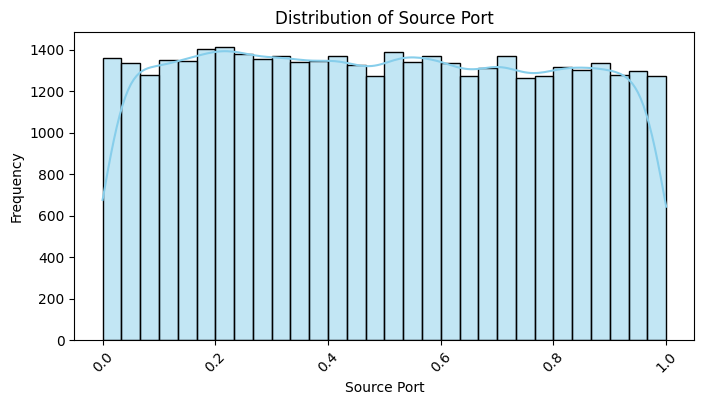

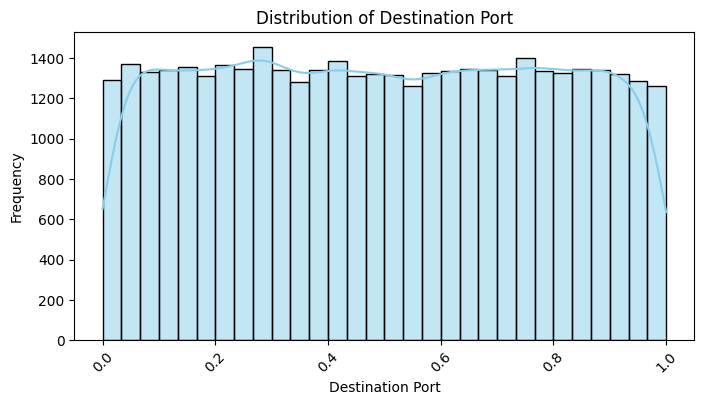

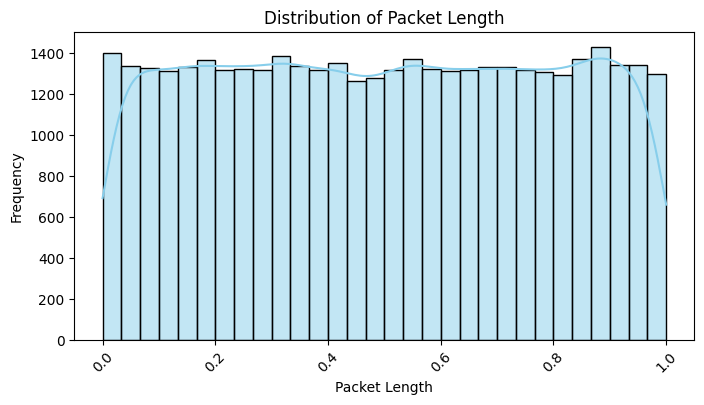

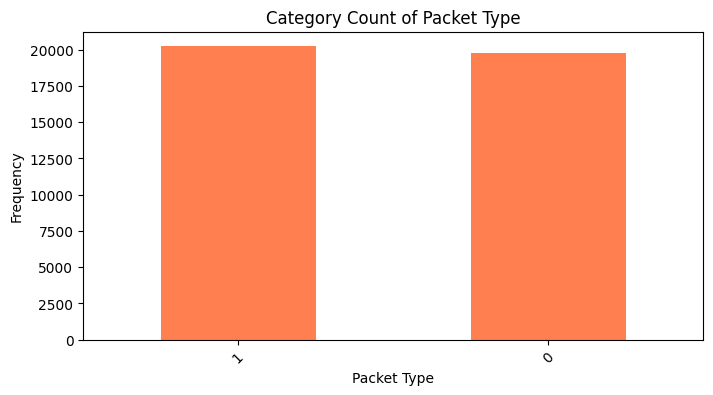

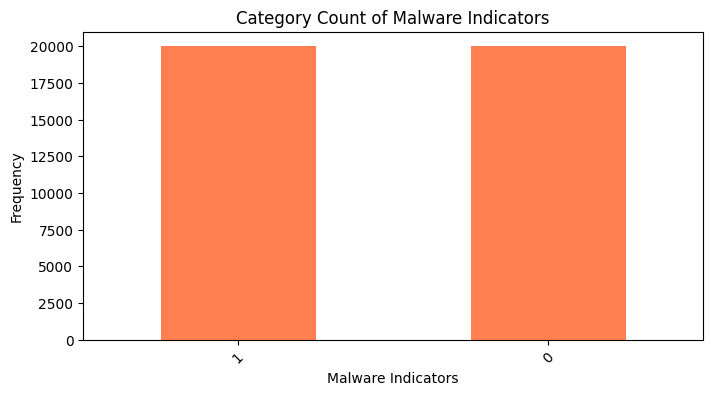

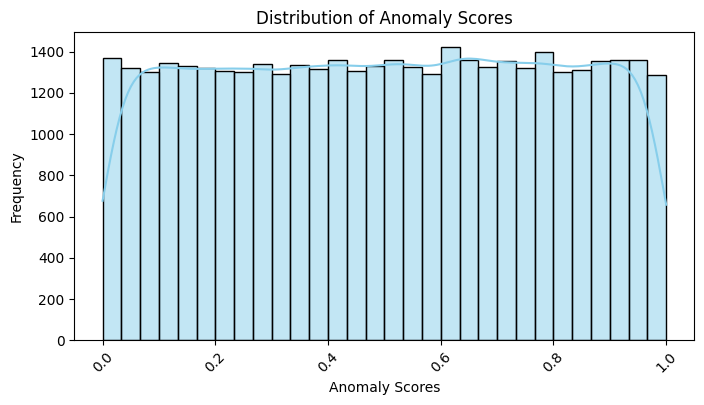

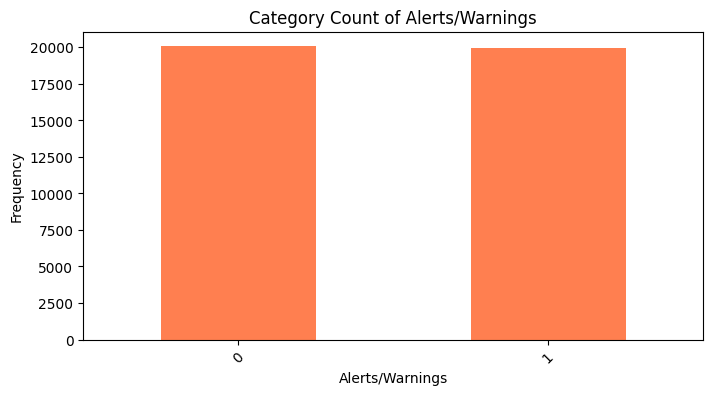

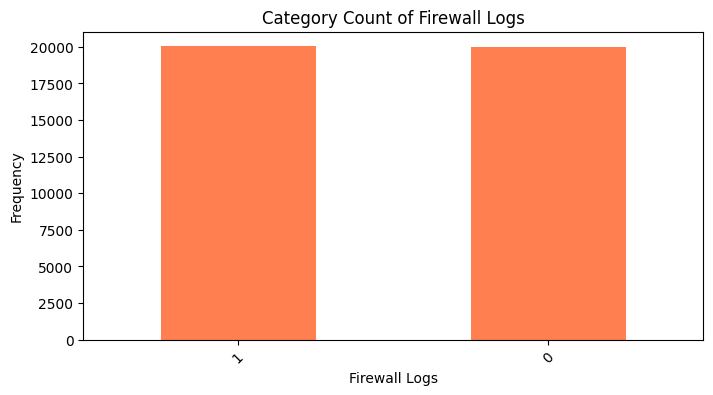

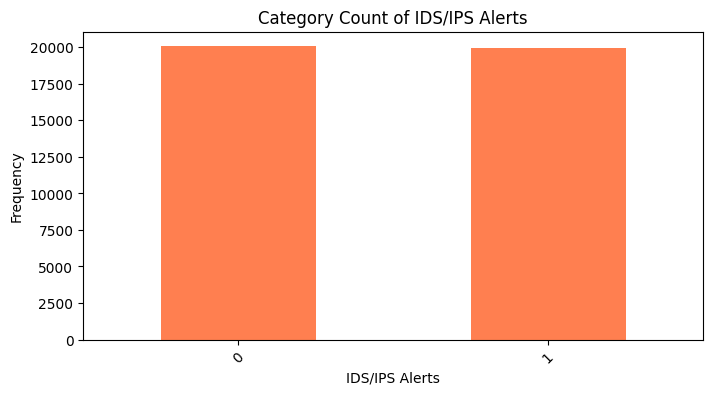

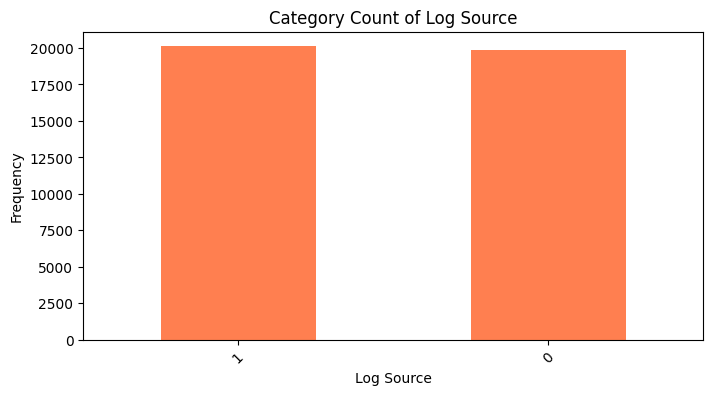

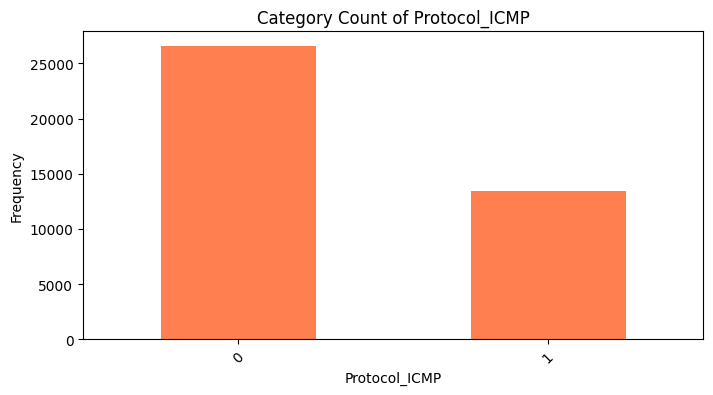

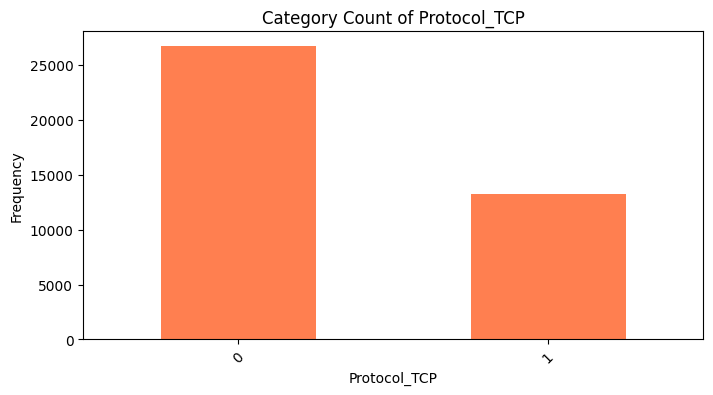

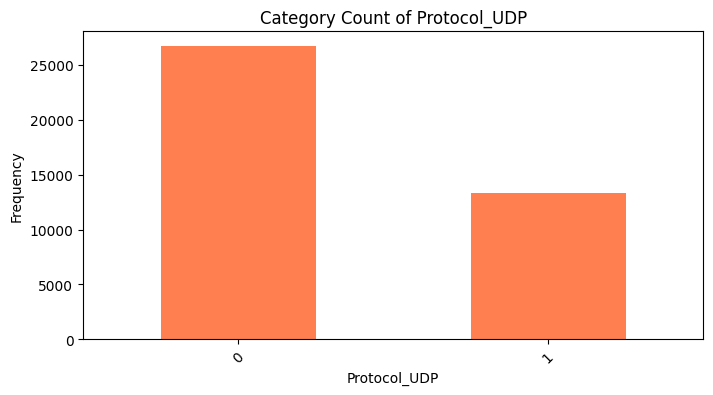

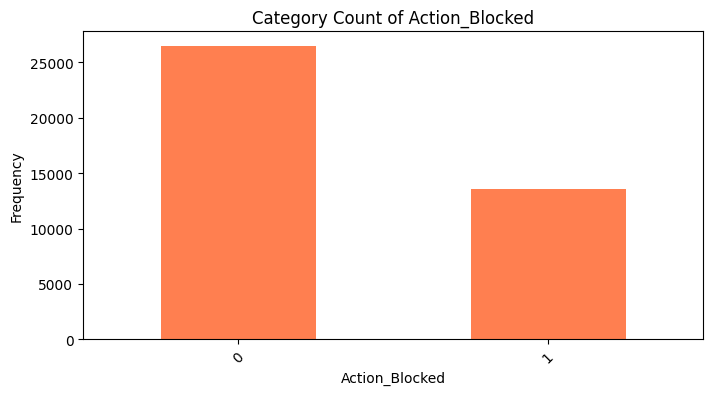

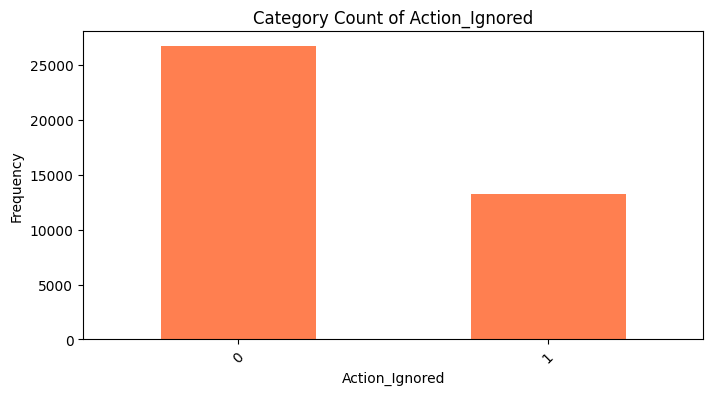

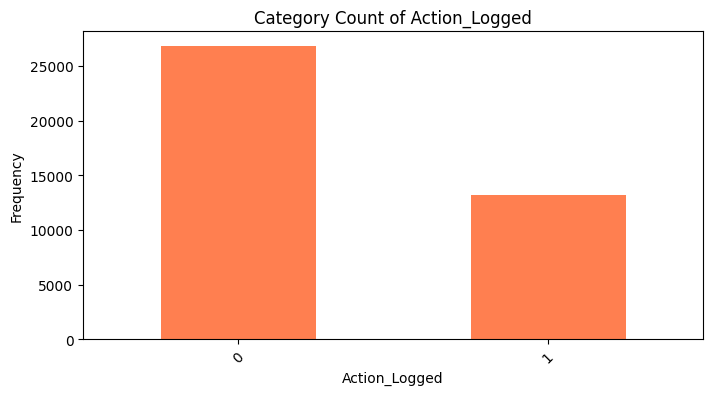

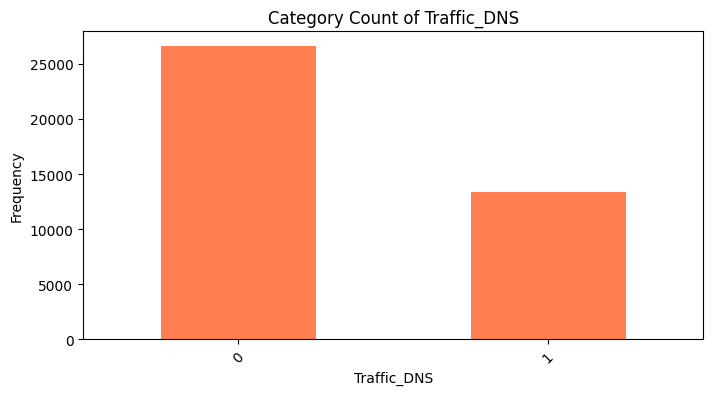

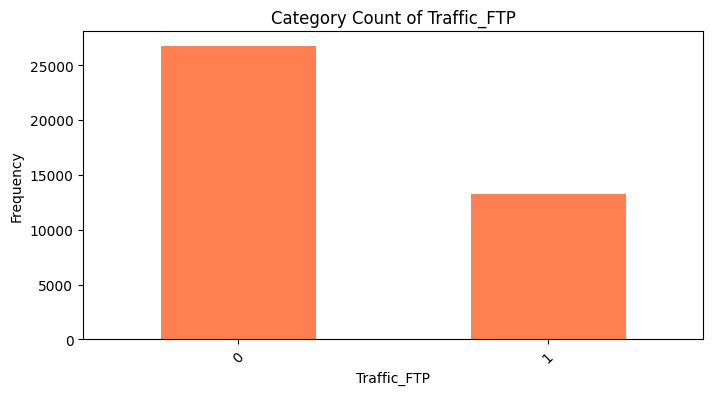

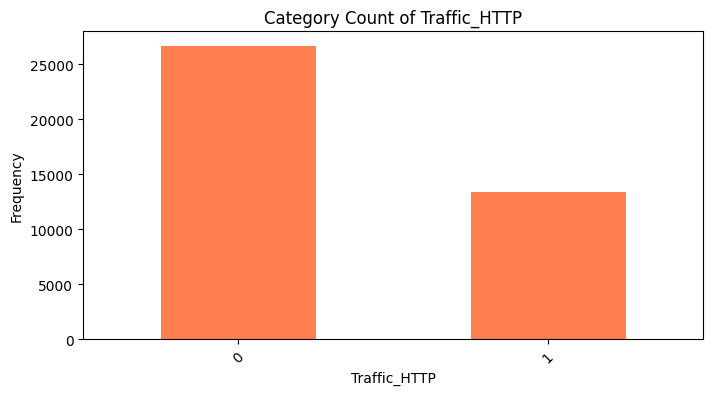

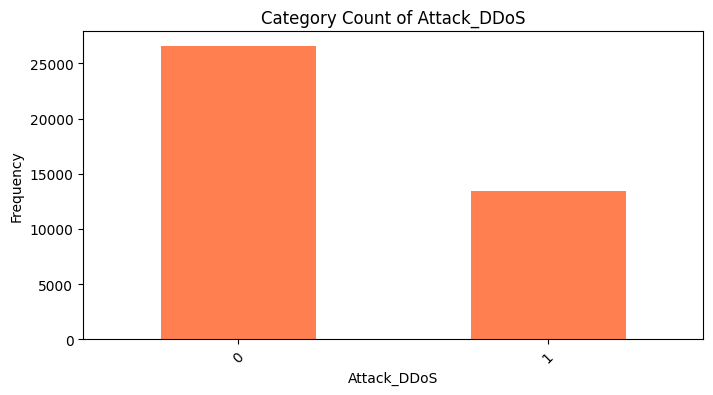

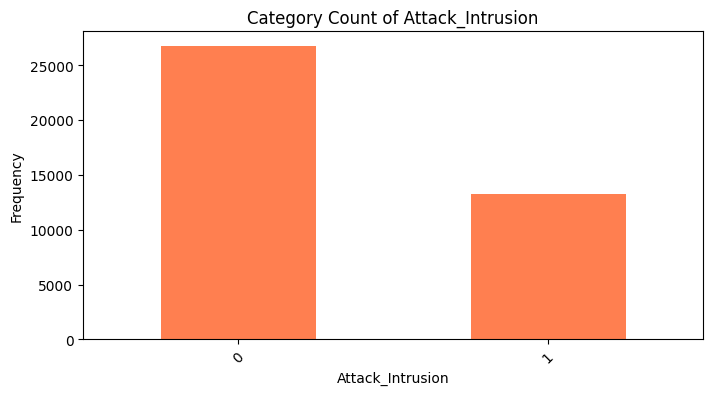

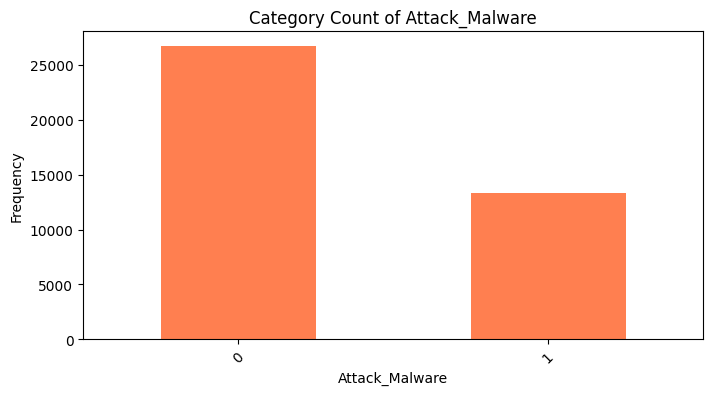

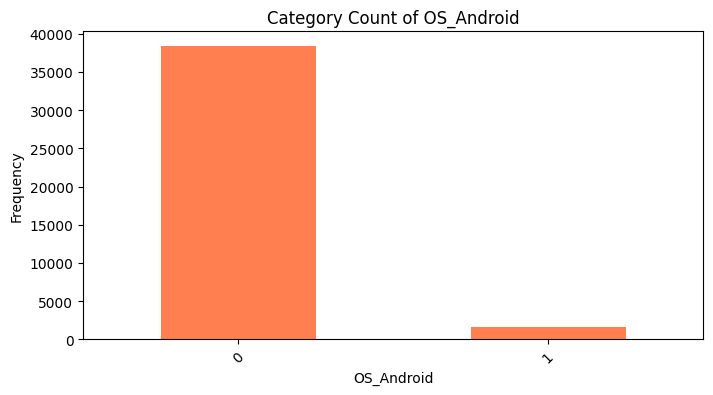

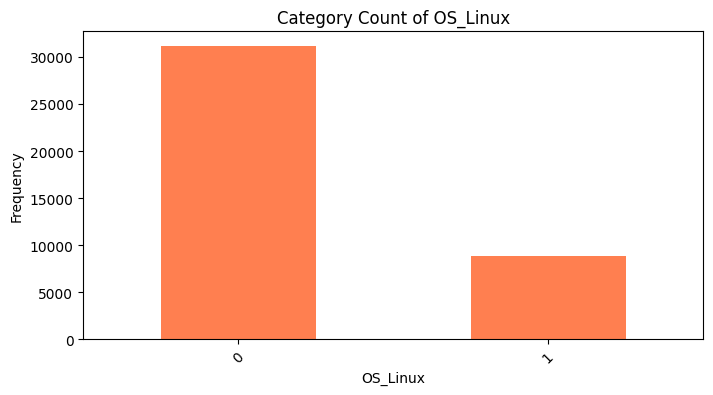

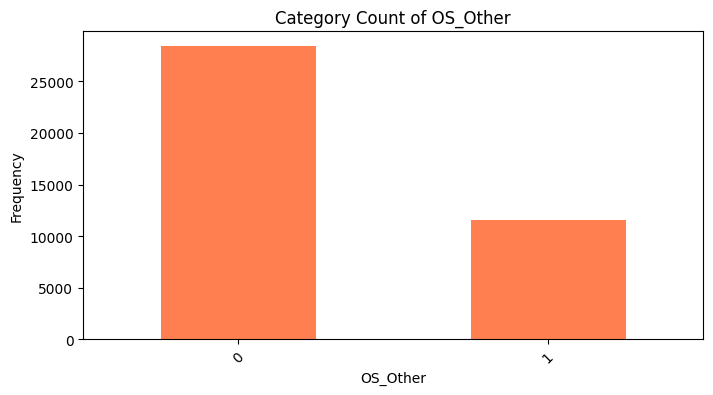

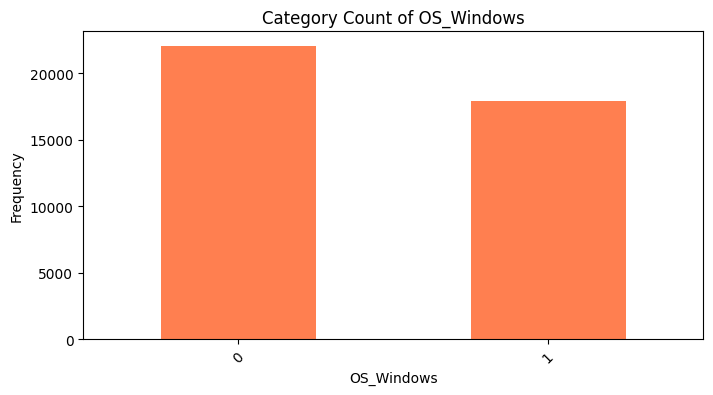

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in df.columns:
    plt.figure(figsize=(8, 4))
    if df[col].nunique() <= 10:  # If categorical, use bar plot
        df[col].value_counts().plot(kind='bar', color="coral")
        plt.title(f'Category Count of {col}')
    else:  # If numeric, use histogram
        sns.histplot(df[col].dropna(), kde=True, bins=30, color="skyblue")
        plt.title(f'Distribution of {col}')

    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()


In [5]:
from sklearn.preprocessing import MinMaxScaler

# Select only numeric columns for normalization
numeric_cols = df.select_dtypes(include=['number']).columns

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Display normalized data
df.head()



,Source Port,Destination Port,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Firewall Logs,IDS/IPS Alerts,Log Source,...,Traffic_DNS,Traffic_FTP,Traffic_HTTP,Attack_DDoS,Attack_Intrusion,Attack_Malware,OS_Android,OS_Linux,OS_Other,OS_Windows
0,0.468164,0.257196,0.305710,0.0,1.0,0.2867,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.251430,0.730759,0.772981,0.0,1.0,0.5150,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.244702,0.814993,0.168524,1.0,1.0,0.8742,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.294420,0.488444,0.223538,0.0,0.0,0.1579,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.079128,0.397173,0.973538,0.0,0.0,0.0052,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


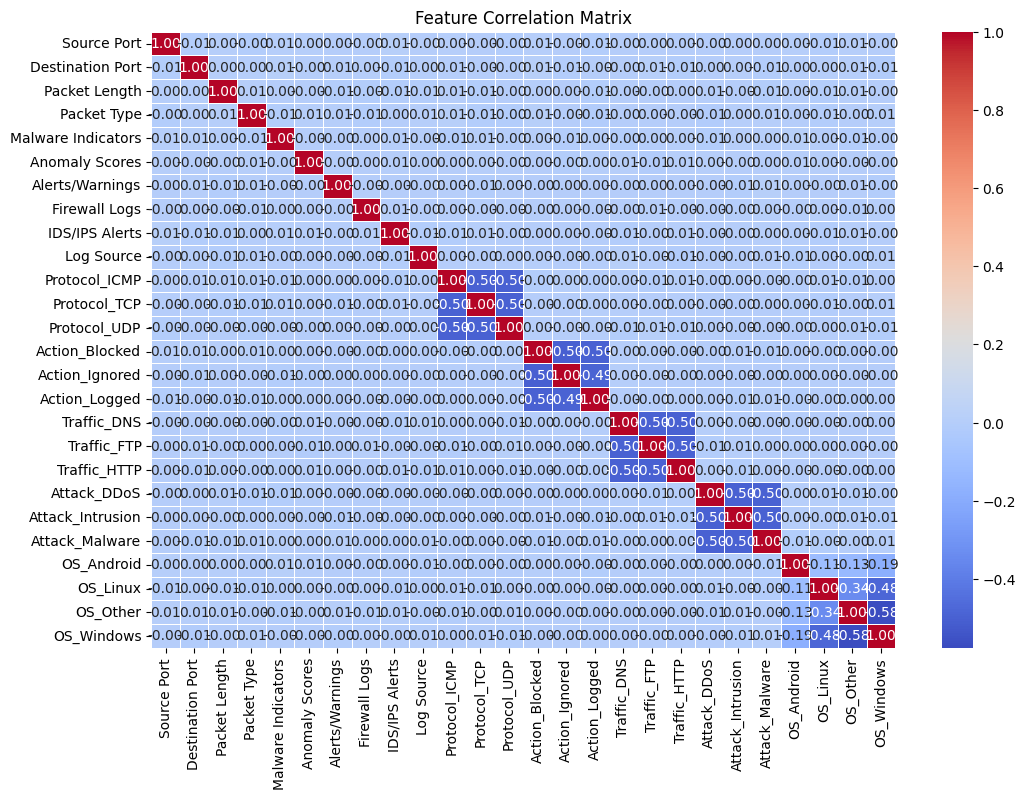

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
correlation_matrix = df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


In [7]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with near-zero variance
selector = VarianceThreshold(threshold=0.03)  # Set threshold based on dataset
selected_features = selector.fit_transform(df)

# Get remaining feature names
selected_feature_names = df.columns[selector.get_support()]
print("Selected Features:", selected_feature_names)


Selected Features: Index(['Source Port', 'Destination Port', 'Packet Length', 'Packet Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Protocol_ICMP',
       'Protocol_TCP', 'Protocol_UDP', 'Action_Blocked', 'Action_Ignored',
       'Action_Logged', 'Traffic_DNS', 'Traffic_FTP', 'Traffic_HTTP',
       'Attack_DDoS', 'Attack_Intrusion', 'Attack_Malware', 'OS_Android',
       'OS_Linux', 'OS_Other', 'OS_Windows'],
      dtype='object')


In [8]:
print(df.columns)  # List all column names



Index(['Source Port', 'Destination Port', 'Packet Length', 'Packet Type',
       'Malware Indicators', 'Anomaly Scores', 'Alerts/Warnings',
       'Firewall Logs', 'IDS/IPS Alerts', 'Log Source', 'Protocol_ICMP',
       'Protocol_TCP', 'Protocol_UDP', 'Action_Blocked', 'Action_Ignored',
       'Action_Logged', 'Traffic_DNS', 'Traffic_FTP', 'Traffic_HTTP',
       'Attack_DDoS', 'Attack_Intrusion', 'Attack_Malware', 'OS_Android',
       'OS_Linux', 'OS_Other', 'OS_Windows'],
      dtype='object')


In [9]:
target_col = 'Anomaly Scores'  # Change this if your actual target column has a different name

# Drop target column only if it exists
if target_col in df.columns:
    X = df.drop(columns=[target_col])
else:
    X = df.copy()  # If no target column, use full dataset

print("Shape of X:", X.shape)  # Check the shape of the feature set


Shape of X: (40000, 25)


In [10]:
import numpy as np

In [11]:
def drop_highly_correlated(data, threshold=0.85):
    corr_matrix = data.corr().abs()
    upper = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(bool)
    )
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return data.drop(columns=to_drop), to_drop

df_reduced, dropped_columns = drop_highly_correlated(df)
print("Dropped columns due to high correlation:", dropped_columns)


Dropped columns due to high correlation: []


OS_Android            0.007374
Traffic_HTTP          0.006315
Traffic_DNS           0.006153
Packet Type           0.005984
IDS/IPS Alerts        0.005534
Source Port           0.004826
Action_Logged         0.003717
Attack_DDoS           0.002996
Protocol_TCP          0.002799
OS_Linux              0.002692
Log Source            0.001830
Firewall Logs         0.001191
Action_Blocked        0.000777
Attack_Malware        0.000301
Protocol_ICMP         0.000202
Malware Indicators   -0.000205
Alerts/Warnings      -0.000824
OS_Other             -0.002407
OS_Windows           -0.002973
Protocol_UDP         -0.003000
Attack_Intrusion     -0.003307
Packet Length        -0.003599
Destination Port     -0.003616
Action_Ignored       -0.004492
Traffic_FTP          -0.012492
Name: Anomaly Scores, dtype: float64


<ipython-input-12-987a560674f1>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')


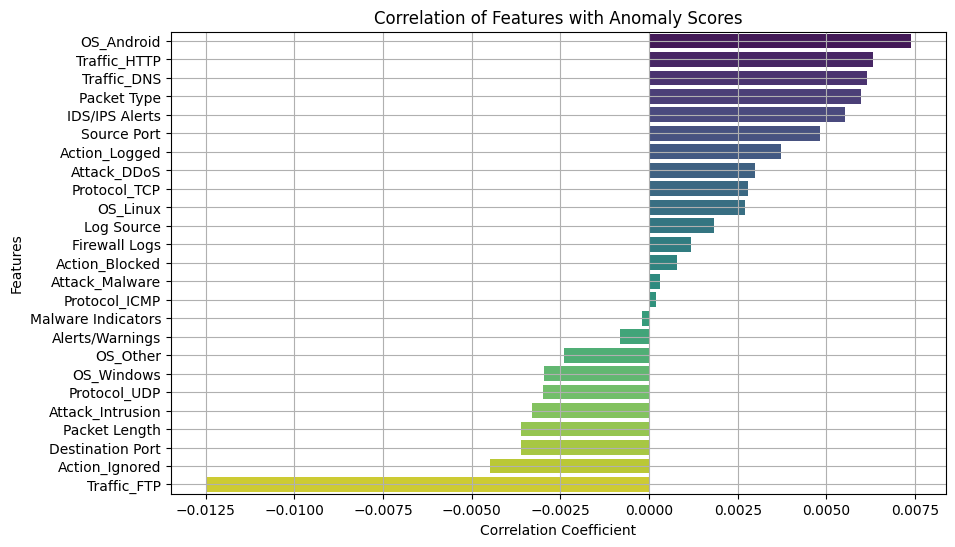

In [12]:
# Replace 'anomaly_score' with the name of your actual target column
target_col = 'Anomaly Scores'

# Ensure the column exists
if target_col in df.columns:
    correlations = df.corr()[target_col].drop(target_col)  # Remove self-correlation
    correlations = correlations.sort_values(ascending=False)  # Sort by strength
    print(correlations)

    # Plot it
    import seaborn as sns
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 6))
    sns.barplot(x=correlations.values, y=correlations.index, palette='viridis')
    plt.title(f'Correlation of Features with {target_col}')
    plt.xlabel('Correlation Coefficient')
    plt.ylabel('Features')
    plt.grid(True)
    plt.show()
else:
    print(f"'{target_col}' column not found in dataframe.")


In [21]:
df.to_csv("Final_dataset.csv", index=False)

In [23]:
pd.read_csv("Final_dataset.csv")

,Source Port,Destination Port,Packet Length,Packet Type,Malware Indicators,Anomaly Scores,Alerts/Warnings,Firewall Logs,IDS/IPS Alerts,Log Source,...,Traffic_DNS,Traffic_FTP,Traffic_HTTP,Attack_DDoS,Attack_Intrusion,Attack_Malware,OS_Android,OS_Linux,OS_Other,OS_Windows
0,0.468164,0.257196,0.305710,0.0,1.0,0.2867,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.251430,0.730759,0.772981,0.0,1.0,0.5150,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.244702,0.814993,0.168524,1.0,1.0,0.8742,1.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.294420,0.488444,0.223538,0.0,0.0,0.1579,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.079128,0.397173,0.973538,0.0,0.0,0.0052,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0.464754,0.088977,0.949861,1.0,1.0,0.3928,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
39996,0.023658,0.419572,0.779944,1.0,1.0,0.2725,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39997,0.332977,0.374014,0.681755,0.0,1.0,0.3101,0.0,1.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
39998,0.294343,0.026027,0.291783,0.0,1.0,0.9785,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [30]:
import numpy as np
from sklearn.model_selection import train_test_split

# Simulate your dataset (replace this with your actual data loading)
X = np.random.rand(40000, 26)  # 40,000 rows, 26 columns

# Split into train and test sets (80% train, 20% test)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)  # (32000, 26)
print("X_test shape:", X_test.shape)    # (8000, 26)

X_train shape: (32000, 26)
X_test shape: (8000, 26)


In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import joblib

# Define the 25 feature columns
DESIRED_COLUMNS = [
    "Source Port", "Destination Port", "Packet Length", "Packet Type", "Malware Indicators",
    "Alerts/Warnings", "Firewall Logs", "IDS/IPS Alerts", "Log Source",
    "Protocol_ICMP", "Protocol_TCP", "Protocol_UDP",
    "Action_Blocked", "Action_Ignored", "Action_Logged",
    "Traffic_DNS", "Traffic_FTP", "Traffic_HTTP",
    "Attack_DDoS", "Attack_Intrusion", "Attack_Malware",
    "OS_Android", "OS_Linux", "OS_Other", "OS_Windows"
]

# Load data
data = pd.read_csv("Final_dataset.csv")  # Replace with your CSV path
X = data[DESIRED_COLUMNS].values

# Preprocessing
X = pd.DataFrame(X, columns=DESIRED_COLUMNS).fillna(0).values  # Handle missing values
X[:, 0] = np.clip(X[:, 0], 0, 65535)  # Clip Source Port
X[:, 1] = np.clip(X[:, 1], 0, 65535)  # Clip Destination Port

# Fit and save the scaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

# Save the normalized data for the next step
np.save("X_scaled.npy", X_scaled)

print("Scaler saved as 'scaler.pkl' and normalized data saved as 'X_scaled.npy'")

Scaler saved as 'scaler.pkl' and normalized data saved as 'X_scaled.npy'


In [32]:
import numpy as np
from sklearn.ensemble import IsolationForest
import joblib

# Load normalized data
X_scaled = np.load("X_scaled.npy")

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(X_scaled)

# Predict anomalies
y_pred = iso_forest.predict(X_scaled)
anomalies = X_scaled[y_pred == -1]  # Filter anomalies (-1)

# Save the model and anomalies
joblib.dump(iso_forest, "iso_forest.pkl")
np.save("anomalies_iso.npy", anomalies)

print("Isolation Forest saved as 'iso_forest.pkl'")
print(f"Found {len(anomalies)} anomalies out of {len(X_scaled)} samples")

Isolation Forest saved as 'iso_forest.pkl'
Found 4000 anomalies out of 40000 samples


In [33]:
import numpy as np
from sklearn.svm import OneClassSVM
import joblib

# Load anomalies from Isolation Forest
anomalies_iso = np.load("anomalies_iso.npy")

# Train One-Class SVM
oc_svm = OneClassSVM(kernel='rbf', nu=0.1, gamma='auto')
oc_svm.fit(anomalies_iso)

# Predict anomalies
y_pred = oc_svm.predict(anomalies_iso)
anomalies_svm = anomalies_iso[y_pred == -1]  # Filter anomalies (-1)

# Save the model and anomalies
joblib.dump(oc_svm, "oc_svm.pkl")
np.save("anomalies_svm.npy", anomalies_svm)

print("One-Class SVM saved as 'oc_svm.pkl'")
print(f"Found {len(anomalies_svm)} anomalies out of {len(anomalies_iso)} samples")

One-Class SVM saved as 'oc_svm.pkl'
Found 399 anomalies out of 4000 samples


In [38]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# Load anomalies from One-Class SVM
anomalies_svm = np.load("anomalies_svm.npy")

# Split into train and validation sets
X_train, X_val = train_test_split(anomalies_svm, test_size=0.2, random_state=42)

# Define the Autoencoder
input_dim = X_train.shape[1]  # 25 features
autoencoder = models.Sequential([
    layers.Input(shape=(input_dim,)),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(input_dim, activation='sigmoid')
])

# Compile the model
autoencoder.compile(optimizer='adam', loss='mse')

# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, patience=3, restore_best_weights=True)

# Train the model
autoencoder.fit(X_train, X_train,
                epochs=20,
                batch_size=32,
                validation_data=(X_val, X_val),
                callbacks=[early_stopping],
                verbose=1)

# Save the model
autoencoder.save("autoencoder.keras")

print("Autoencoder saved as 'autoencoder.keras'")

Epoch 1/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - loss: 0.2420 - val_loss: 0.2412
Epoch 2/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2398 - val_loss: 0.2391
Epoch 3/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2376 - val_loss: 0.2368
Epoch 4/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2352 - val_loss: 0.2338
Epoch 5/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2326 - val_loss: 0.2304
Epoch 6/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2281 - val_loss: 0.2267
Epoch 7/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2241 - val_loss: 0.2230
Epoch 8/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2203 - val_loss: 0.2196
Epoch 9/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2175 - val_loss: 0.2167
Epoch 10/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2156 - val_loss: 0.2142
Epoch 11/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2127 - val_loss: 0.2122
Epoch 12/20
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2105 - val_

In [39]:
df.to_csv("Final_dataset.csv", index=False)